## Trying to find points inside the circle $x^2 + y^2 = 10$

In [ ]:
from tensorflow import keras

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
train = 5*np.random.randn(10000,3)
train[:,2] = (10>train[:,0]**2+train[:,1]**2)

In [ ]:
train[:10,:]

array([[ -7.24180282,   4.78005928,   0.        ],
       [-12.23814652,  -4.72071083,   0.        ],
       [ -3.52900485,  -6.98704177,   0.        ],
       [ -4.69195046,   0.87583639,   0.        ],
       [ -4.01571928,  -0.17243507,   0.        ],
       [ -6.35889009,  -1.6075541 ,   0.        ],
       [ -3.17535568,   1.83054138,   0.        ],
       [  1.73476739,  -2.764579  ,   0.        ],
       [  8.01416379,   5.50339082,   0.        ],
       [  1.35728889,  -4.55825649,   0.        ]])

In [ ]:
X = train[:,:-1]
y = train[:,-1]

In [ ]:
model = keras.models.Sequential()
# This is the most confusing part, add both the input layer and the first hidden layer simultaneously
model.add(keras.layers.Dense(2,input_dim=2,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=0.1),metrics="accuracy")
history = model.fit(X,y,epochs=10,verbose=1,validation_split=0.1)

Epoch 1/10
282/282 [==============================] - 1s 1ms/step - loss: 0.6815 - accuracy: 0.7835 - val_loss: 0.4538 - val_accuracy: 0.8040
Epoch 2/10
282/282 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8263 - val_loss: 0.4468 - val_accuracy: 0.8040
Epoch 3/10
282/282 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8239 - val_loss: 0.4410 - val_accuracy: 0.8040
Epoch 4/10
282/282 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8211 - val_loss: 0.4381 - val_accuracy: 0.8040
Epoch 5/10
282/282 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8179 - val_loss: 0.4364 - val_accuracy: 0.8040
Epoch 6/10
282/282 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8195 - val_loss: 0.4365 - val_accuracy: 0.8040
Epoch 7/10
282/282 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8252 - val_loss: 0.4310 - val_accuracy: 0.8040
Epoch 

In [ ]:
list(history.history.keys())

['loss', 'accuracy', 'val_loss', 'val_accuracy']

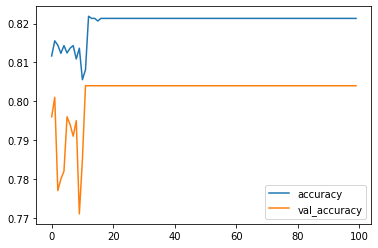

In [ ]:
measures = ["accuracy", "val_accuracy"]
for measure in measures:
    plt.plot(history.history[measure])
plt.legend(measures)

In [ ]:
model.predict([[5,5]])

array([[9.187044e-19]], dtype=float32)

In [ ]:
import seaborn as sns

In [ ]:
test = 3*np.random.randn(500,2)

In [ ]:
df = pd.DataFrame(test,columns=["x","y"])

In [ ]:
df['pred']=model.predict(df)

In [ ]:
df.shape

(500, 3)

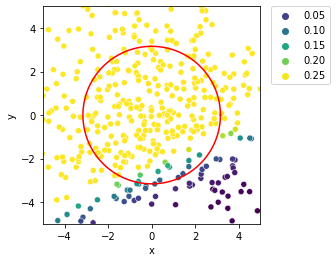

In [ ]:
plt.xlim(-5,5)
plt.ylim(-5,5)
ax = sns.scatterplot(data=df,x='x',y='y',hue='pred',palette=sns.color_palette("viridis", as_cmap=True));
t = np.linspace(0,2*np.pi,100)
r = np.sqrt(10)
plt.plot(r*np.cos(t),r*np.sin(t),color='r')
ax.set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
for l in model.layers:
    print(l.get_weights())

[array([[-0.02447839, -3.6374788 ,  0.6089721 ,  2.7436342 ],
       [-0.02754512, -1.2201235 ,  3.6846814 , -2.5037298 ]],
      dtype=float32), array([ 6.605966  , -0.13889983, -0.55681336,  0.02417417], dtype=float32)]
[array([[ 5.0971837],
       [-3.4167314],
       [-3.4959176],
       [-3.359668 ]], dtype=float32), array([3.3386497], dtype=float32)]


In [ ]:
X = np.random.randn(10**4,2)

In [ ]:
y = (X[:,1]>abs(X[:,0])).reshape(-1,1)

In [ ]:
model = keras.models.Sequential()
# This is the most confusing part, add both the input layer and the first hidden layer simultaneously
model.add(keras.layers.Dense(1,input_dim=2,activation="relu"))
model.add(keras.layers.Dense(1,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=0.1),metrics="accuracy")
history = model.fit(X,y,epochs=10,verbose=1,validation_split=0.1)

Epoch 1/10
282/282 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7472 - val_loss: 0.3268 - val_accuracy: 0.7800
Epoch 2/10
282/282 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8125 - val_loss: 0.2621 - val_accuracy: 0.8690
Epoch 3/10
282/282 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.8654 - val_loss: 0.2571 - val_accuracy: 0.8740
Epoch 4/10
282/282 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8696 - val_loss: 0.2543 - val_accuracy: 0.8720
Epoch 5/10
282/282 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.8725 - val_loss: 0.2504 - val_accuracy: 0.8750
Epoch 6/10
282/282 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.8735 - val_loss: 0.2534 - val_accuracy: 0.8760
Epoch 7/10
282/282 [==============================] - 0s 1ms/step - loss: 0.2731 - accuracy: 0.8702 - val_loss: 0.2607 - val_accuracy: 0.8720
Epoch 

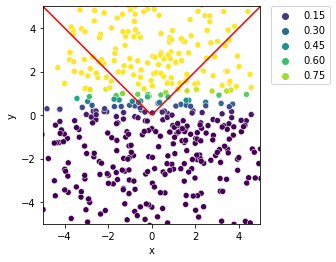

In [ ]:
test = 3*np.random.randn(500,2)
df = pd.DataFrame(test,columns=['x','y'])
df['pred']=model.predict(df)
plt.xlim(-5,5)
plt.ylim(-5,5)
ax = sns.scatterplot(data=df,x='x',y='y',hue='pred',palette=sns.color_palette("viridis", as_cmap=True));
true_x = np.linspace(-5,5,100)
plt.plot(true_x,np.abs(true_x),color='r')
ax.set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
a_1 = 3

In [ ]:
a_1

3

In [ ]:
true_x

NameError: name 'true_x' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6b3e01f-a911-4e8b-b982-1e08ec29fa96' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>